In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers  = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [3]:
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / e_x.sum()


In [4]:
activations = {
    'ReLU': relu,
    r'Leaky ReLU($\alpha=0.1$)': leaky_relu,
    r'ELU($\alpha=1$)': elu,
    'GELU': gelu,
    'sigmoid': sigmoid,
    'tanh': tanh,
    'Swish(SiLU)': swish,
}

In [5]:
def plot_activations(activations):
    x = np.linspace(-5, 5, 100)
    n = len(activations) + 2  # +1 for softmax response, +1 for comparison plot
    cols = 3
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 6 * rows))
    axes = axes.flatten()

    for idx, (name, func) in enumerate(activations.items()):
        y = func(x)
        ax = axes[idx]
        if name == 'softmax':
            # Plot softmax as a component response
            ax.bar(range(len(x)), y)
            ax.set_xlabel("Index")
            ax.set_ylabel("Probability")
        else:
            ax.plot(x, y)
            ax.set_xlabel("Input")
            ax.set_ylabel("Output")
        ax.set_title(name)
        ax.grid(True)

    # Plot softmax component response
    ax = axes[len(activations)]
    x_values = np.linspace(-5, 5, 100)
    probs = []
    for x_val in x_values:
        vec = np.array([0.0, 0.0, x_val])  # Only third entry varies
        sm = softmax(vec)
        probs.append(sm[2])
    ax.plot(x_values, probs)
    ax.set_title("Softmax")
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")
    ax.grid(True)

    # Plot comparison of ReLU, GELU, and Swish
    ax = axes[len(activations) + 1]
    ax.plot(x, relu(x), label='ReLU', color=getColour(1))
    ax.plot(x, gelu(x), label='GELU', color=getColour(2))
    ax.plot(x, swish(x), label='Swish(SiLU)', color=getColour(0))
    ax.set_title("ReLU vs GELU vs SiLU(Swish)")
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")
    ax.legend()

    fig.suptitle(fr"Activation Functions $x \in [-5, 5]$", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


$$
    \text{ReLU}(x) = \max(0, x)\\
    \text{Leaky ReLU}(x) = 
    \begin{cases}
        x & \text{if } x > 0 \\
        \alpha x & \text{if } x \leq 0
    \end{cases}\\
    \text{ELU}(x) = 
    \begin{cases}
        x & \text{if } x > 0 \\
        \alpha (e^x - 1) & \text{if } x \leq 0
    \end{cases}\\
    \text{GELU}(x) = x \Phi(x) = \frac{x}{2} \left(1 + \text{tanh}\left(\frac{\sqrt{2/\pi}(x + 0.044715x^3)}{2}\right)\right)\\
    \text{Swish}(x) = x \cdot \text{sigmoid}(x)\\
    \text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}\\
    \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}\\
    \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}\\
$$

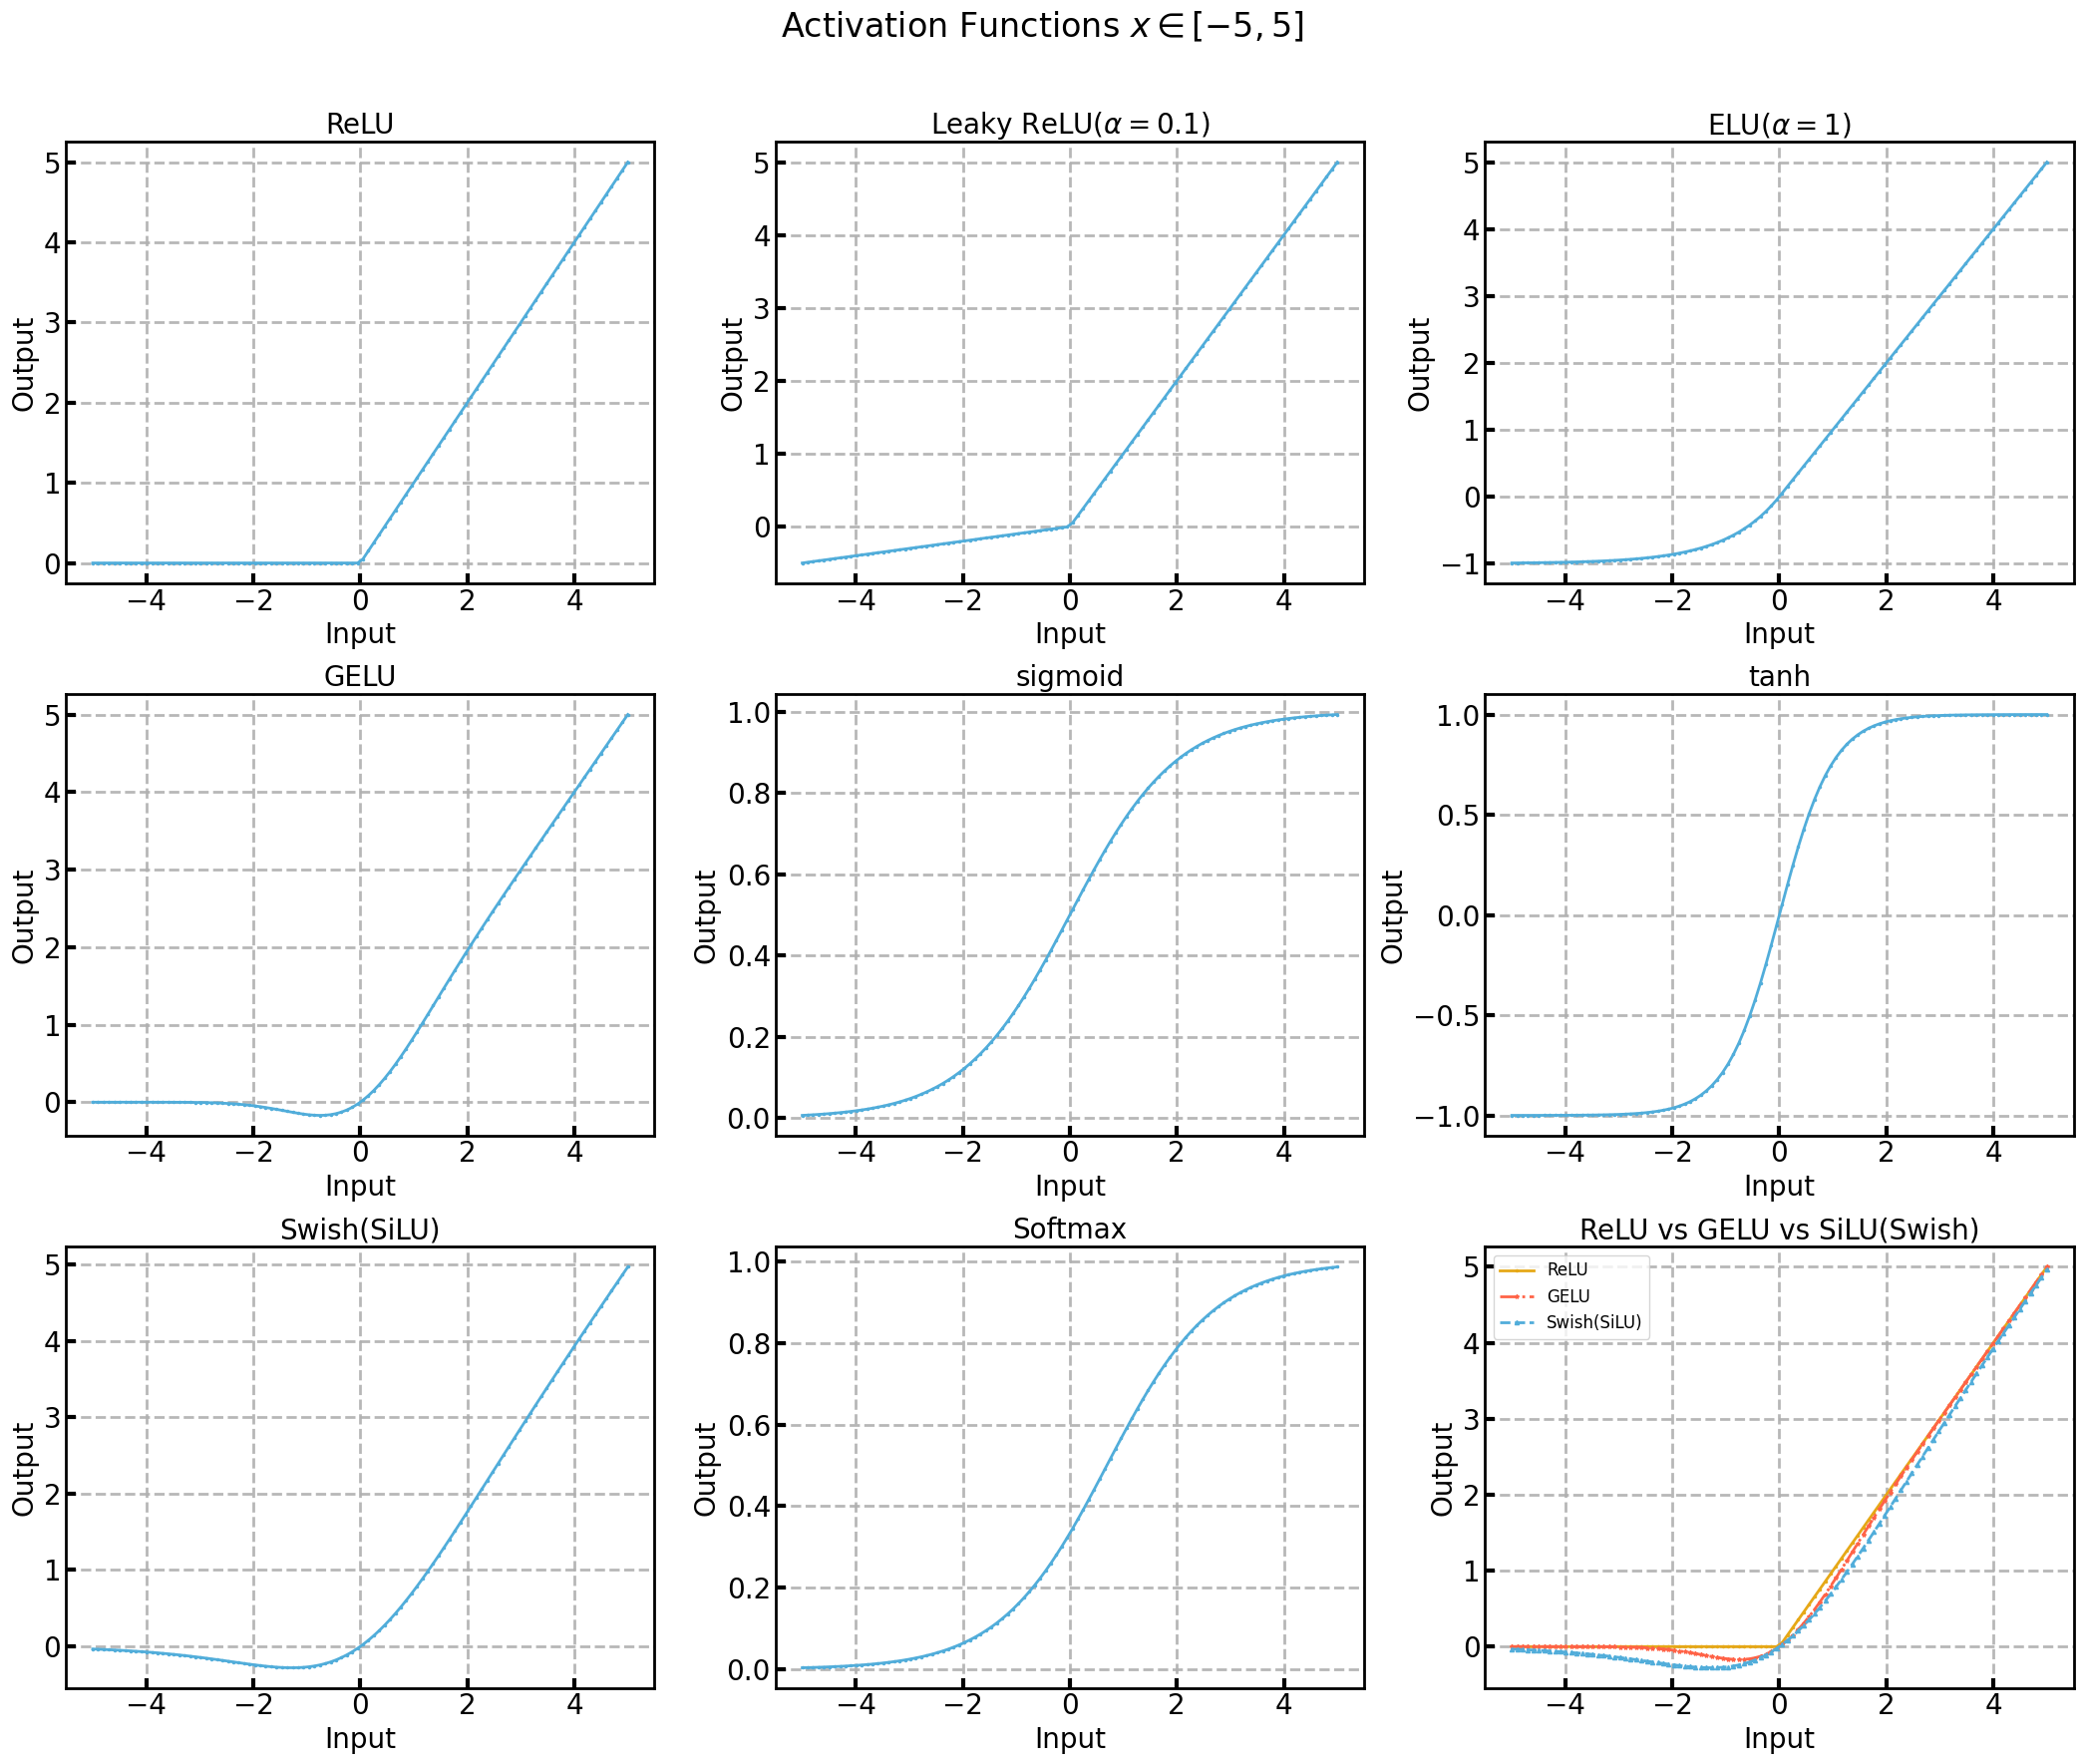

In [6]:
plot_activations(activations)

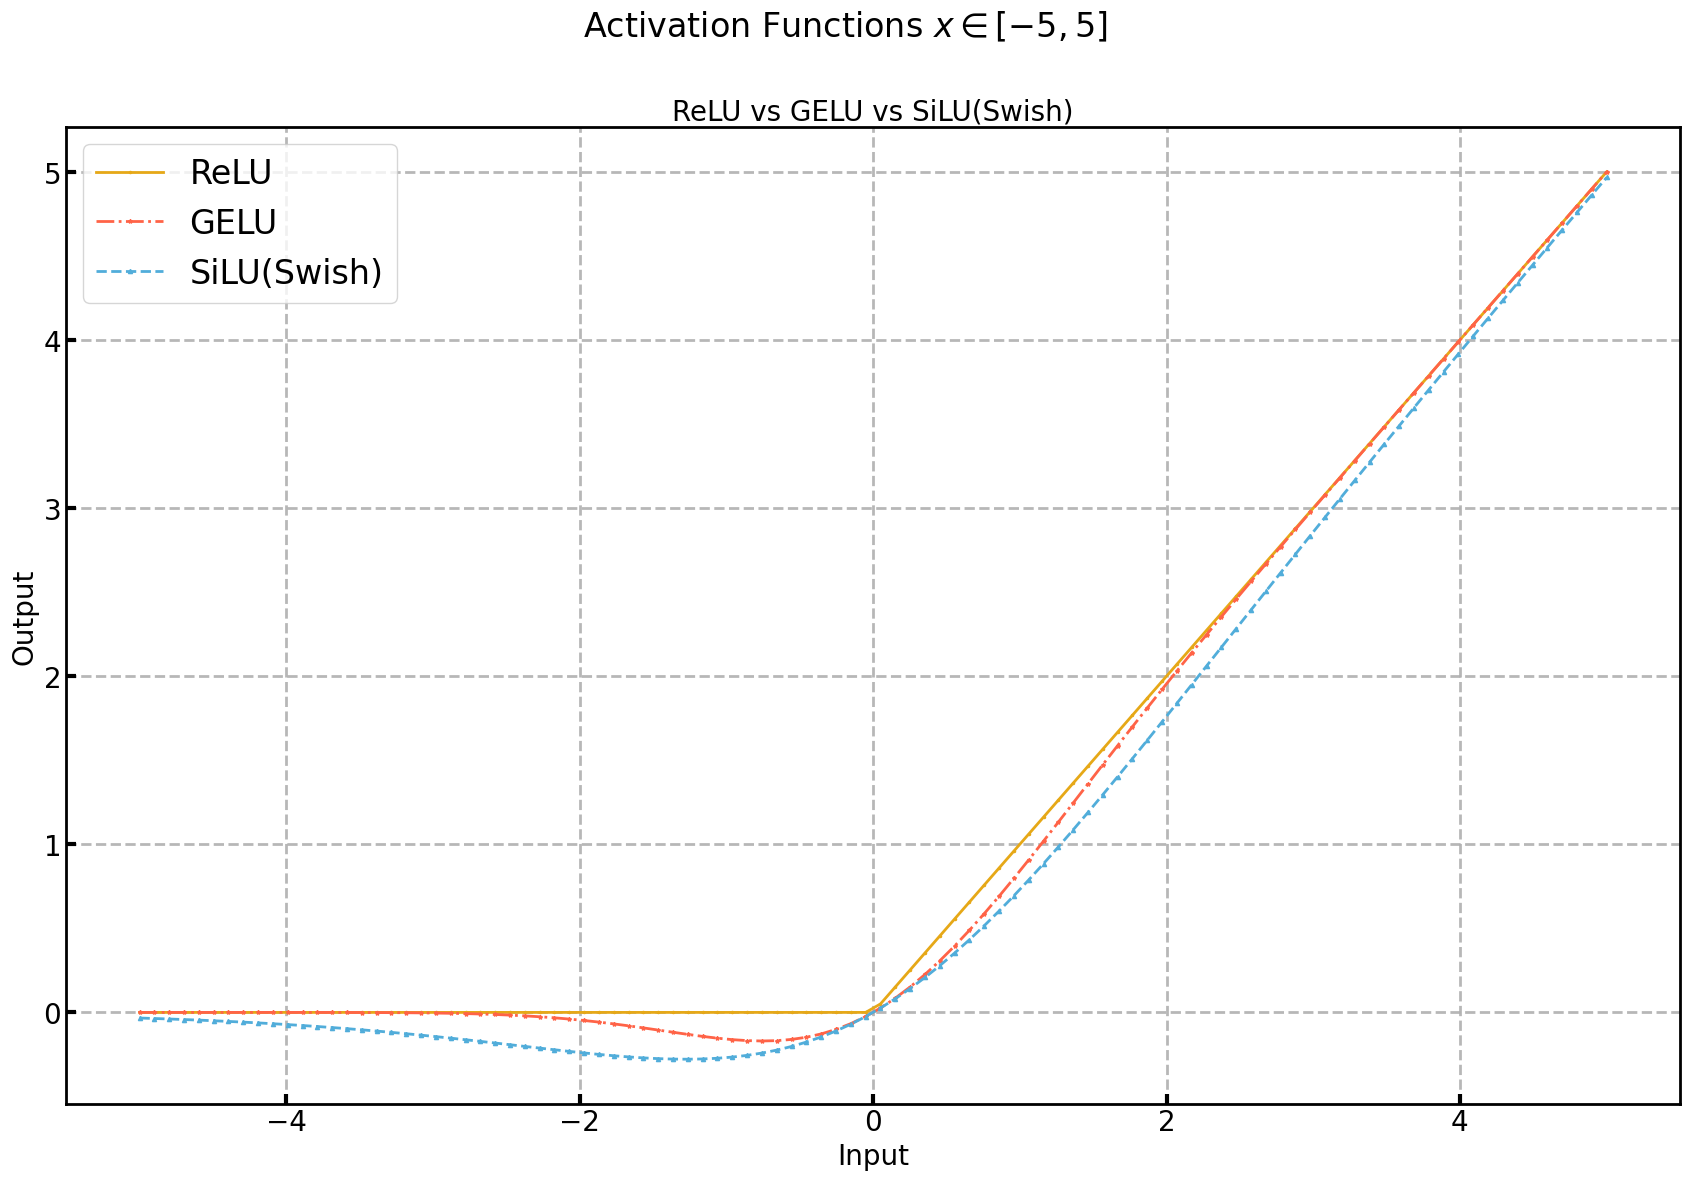

In [7]:
def plot_ReLu_GELU_SiLU():
    x = np.linspace(-5, 5, 100)
    fig, ax = plt.subplots(figsize=(17, 12))

    ax.plot(x, relu(x), label='ReLU', color=getColour(1), linewidth=2)
    ax.plot(x, gelu(x), label='GELU', color=getColour(2), linewidth=2)
    ax.plot(x, swish(x), label='SiLU(Swish)', color=getColour(0), linewidth=2)
    ax.set_title("ReLU vs GELU vs SiLU(Swish)")
    ax.set_xlabel("Input")
    ax.set_ylabel("Output")
    ax.legend(fontsize=24)
    fig.suptitle(fr"Activation Functions $x \in [-5, 5]$", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
plot_ReLu_GELU_SiLU()